# Анализ игровой индустрии. Определение закономерностей, определяющих успешность игр

# Краткое описание проекта

 Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Цель проекта

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

# План работы

1. Знакомство с данными.
2. Предобработка данных.
3. Анализ, визуализация.
4. Вывод.

# Описание столбцов данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1. Откроем файл с данными и изучим его содержимое

In [1]:
# Импортирую основные библиотеки для работы
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt

In [2]:
data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Предаброботка данных

In [5]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# В столбце name есть две строчки с пропуском, удалю эти сроки
data = data.dropna(subset = ['name'])

# Аналогично сдеаю и для стобца с датой релиза
data = data.dropna(subset = ['year_of_release'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
data.tail(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


In [9]:
# В столбцах critic_score, user_score и rating большое количесвто пропусков. Исправим это заменив их на аномальыне значения.

data['critic_score'] = data['critic_score'].fillna(200)
data['user_score'] = data['user_score'].fillna(20)
data['rating'] = data['rating'].fillna('PROPUSK')

data.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,PROPUSK
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,200.0,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,200.0,20,PROPUSK
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,200.0,20,PROPUSK
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,200.0,20,PROPUSK
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,200.0,20,PROPUSK
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,200.0,20,PROPUSK
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,200.0,20,PROPUSK
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,200.0,20,PROPUSK
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,200.0,20,PROPUSK


In [10]:
# В столбце user_score есть значения tbd. Это значит, что оценка игроков ещё не сформированна. 
# Заменю tbd на такое же аномальное значаение как и выше в этом столбце

data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].replace(np.NaN, -5)
data['user_score'] = data['user_score'].astype('float')

data.tail(30)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.00,0.00,0.01,0.0,200.0,20.0,PROPUSK
16686,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,0.00,0.00,0.01,0.0,200.0,20.0,PROPUSK
16687,Neo Angelique Special,PSP,2008.0,Adventure,0.00,0.00,0.01,0.0,200.0,20.0,PROPUSK
16688,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,0.01,0.00,0.00,0.0,200.0,-5.0,T
16689,Real Rode,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,200.0,20.0,PROPUSK
16690,Pony Friends 2,PC,2009.0,Simulation,0.00,0.01,0.00,0.0,200.0,20.0,PROPUSK
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.0,200.0,20.0,PROPUSK
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.0,80.0,7.6,M
16693,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.0,200.0,20.0,PROPUSK
16694,Carmageddon 64,N64,1999.0,Action,0.01,0.00,0.00,0.0,200.0,20.0,PROPUSK


In [11]:
# Поменям тип данных в нескольких столбцах

data['year_of_release'] = data['year_of_release'].astype('int')
# data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [14]:
# создам столбец в котором будет сумма продаж всех регионов

data['full_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,200.0,20.0,PROPUSK,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,200.0,20.0,PROPUSK,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,200.0,20.0,PROPUSK,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,200.0,20.0,PROPUSK,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,200.0,20.0,PROPUSK,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,200.0,20.0,PROPUSK,0.01


In [15]:
# Проверим data на дубликаты 

data.duplicated().sum()

0

- Причина пропусков в столбце year_of_release странная, я как игроман могу сказать, что это первое на что я смотрю когда меня интересует игра и абсолютно всегда такого рода данные есть (вплоть до числа и месяца). Скорее всего при выгрузке они повредились. 
- Пропуски в столбце user_score в частности tbd - значит что рейтинг просто не успел сформироваться.
- Что касается пропусков в столбце rating, то я думаю, что игра просто не популярна, поэтому ее рейтинг отсутствует.

# Шаг 3. Проведем исследовательский анализ 

In [16]:
# Посмотрим сколько игр продавлось в разные года

data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<Axes: xlabel='year_of_release'>

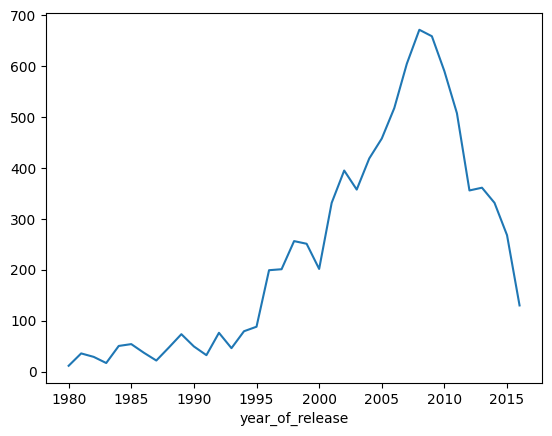

In [17]:
# Визуализируем это

data.groupby('year_of_release')['full_sales'].sum().plot()

Не думаю, что нам понадобятся игрs, старше или равные 2014 году, поэтому их мы не будем рассматривать.

In [18]:
# Посмотрим как менялись продажи игр по платформам
# Создадим отдельную переменную куда это запишем

platforms = data.groupby('platform')['full_sales'].sum().sort_values(ascending=False)
platforms.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: full_sales, dtype: float64

<Axes: xlabel='platform'>

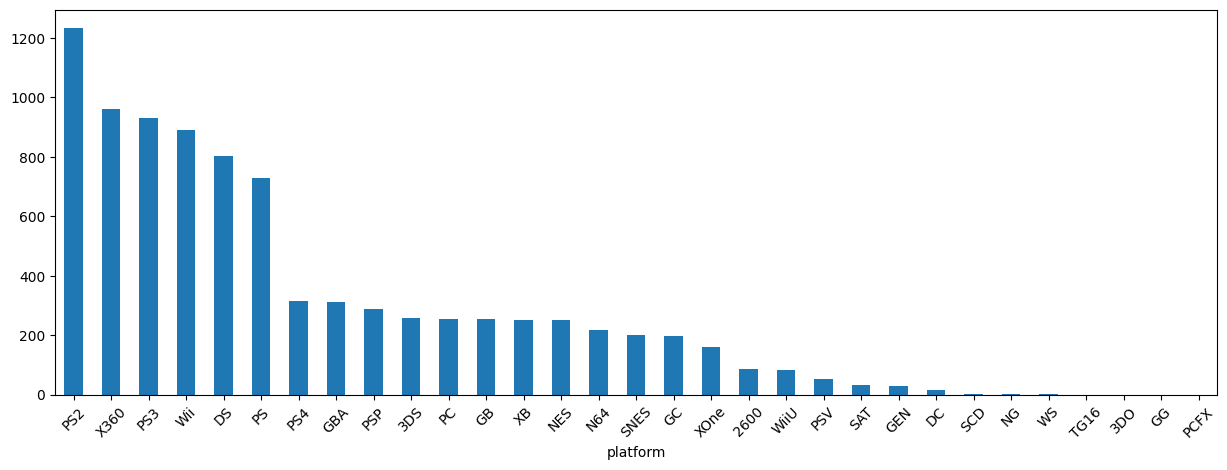

In [20]:
#Визуализируем это на гистограме

platforms.plot(kind='bar', rot=45, figsize=(15, 5))

In [21]:
# Уберем игры старше или равное 2014 году

data = data[data['year_of_release'] >= 2014]
data = data.reset_index()
data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,200.0,20.0,PROPUSK,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,200.0,20.0,PROPUSK,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,200.0,20.0,PROPUSK,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,200.0,20.0,PROPUSK,0.01
1685,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,200.0,20.0,PROPUSK,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,200.0,20.0,PROPUSK,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,200.0,20.0,PROPUSK,0.01


<Axes: xlabel='platform'>

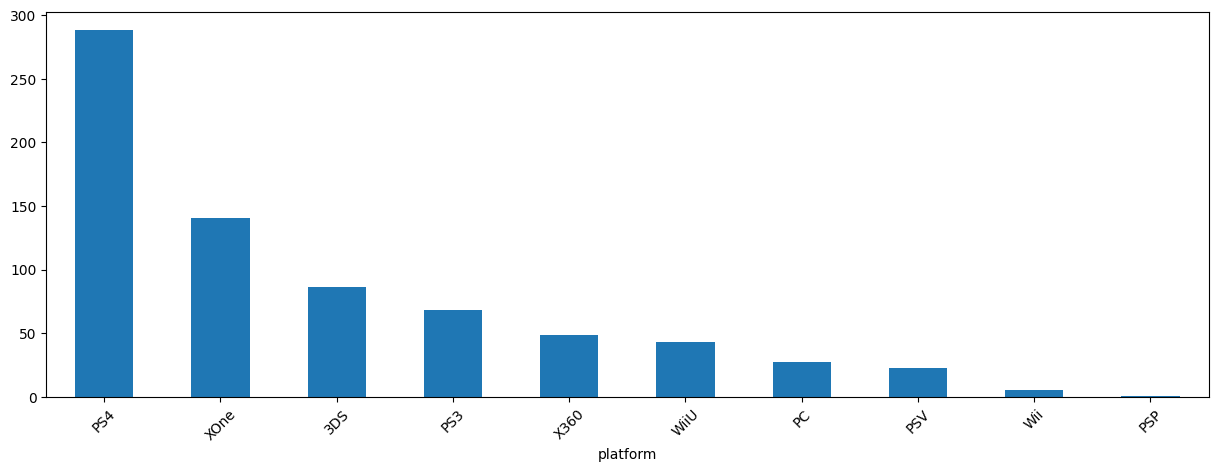

In [22]:
# После того, как отбросили игры моложе 2014 года, то я посмотрю топ 5 лучших платформ.

platforms_2 = data.groupby('platform')['full_sales'].sum().sort_values(ascending=False)
platforms_2.plot(kind='bar', rot=45, figsize=(15, 5))

Исходя из обновленной диаграммы выделю топ-5 актуальных платформ: PS4, XOne, 3DS, PS3, X360

In [23]:
# Выведем частоту повторения уникальынх платформ
platforms = data.groupby('platform')['full_sales'].count()
print(platforms.sort_values(ascending=False))

platform
PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: full_sales, dtype: int64


(0.0, 5.0)

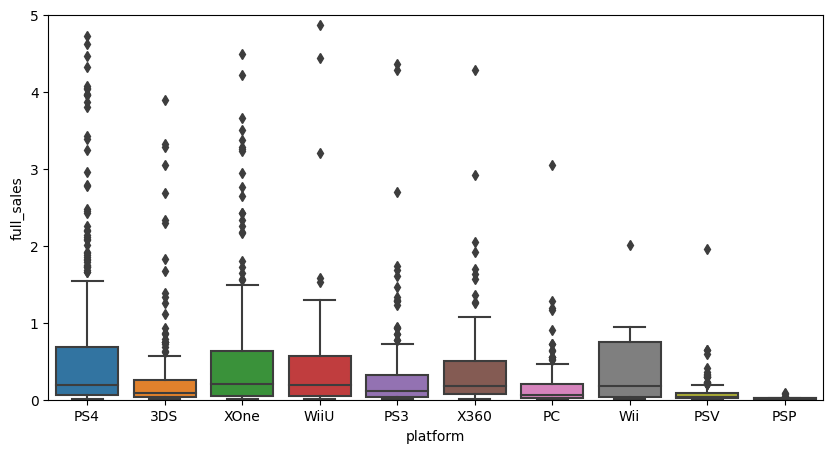

In [24]:
# Визуализируем диаграмму размаха по продажам игр по платформам

plt.figure(figsize=(10,5))
boxplot = sns.boxplot(y=data['full_sales'], x=data['platform'])

# диаграмма получилось приплющенной после запуска, поэтому слегка увеличу её

plt.ylim(0, 5)

Самый большой разброс имеет платформы PS4, XOne и WiUU. Самое большое количество выбросов имеет PS4, XOne и 3DS. Платформы Wii, PS3 и X360 имеют низкий разброс относительно остальных. Что касается платформы PC, то я как пользователь ПК могу сказать, что на эту платформу несколько раз в год выходит ну очень крутых игр, НО графика игр требует хорошего железа внутри самого ПК, поэтому во многие игрушки я не могу поиграть, соответственно я их и не покупаю, поэтому эта платформа точно не даст хороших показателей на 2017 год. 

Диаграммы рассеивания продаж игр в зависимости от рейтинга игроков


<Axes: xlabel='user_score', ylabel='full_sales'>

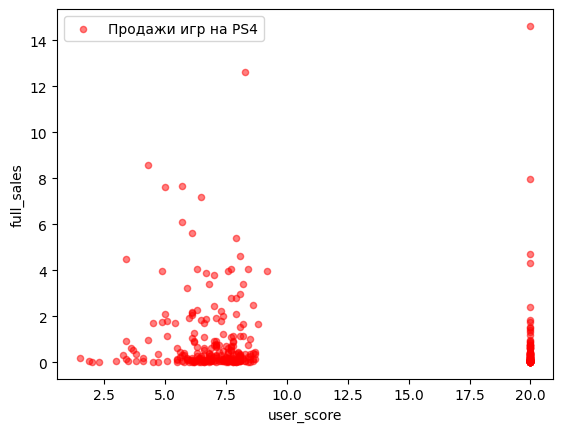

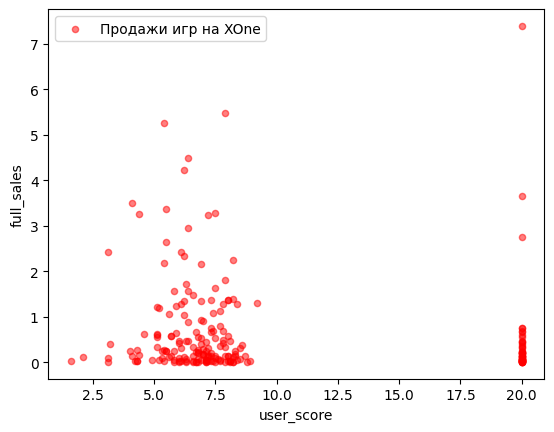

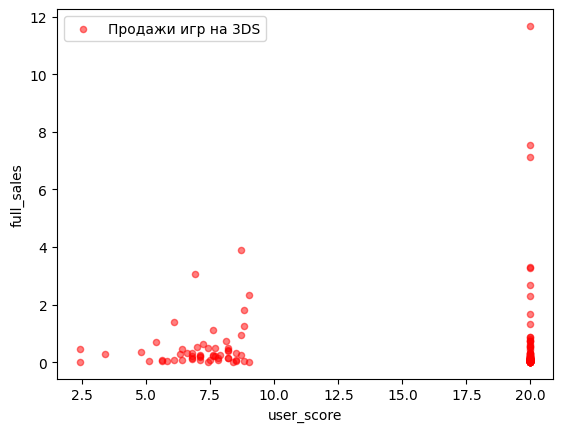

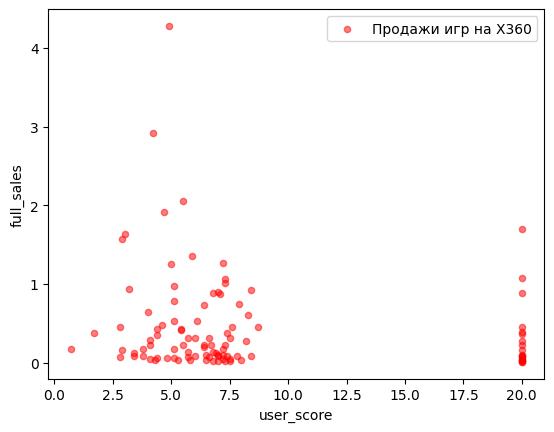

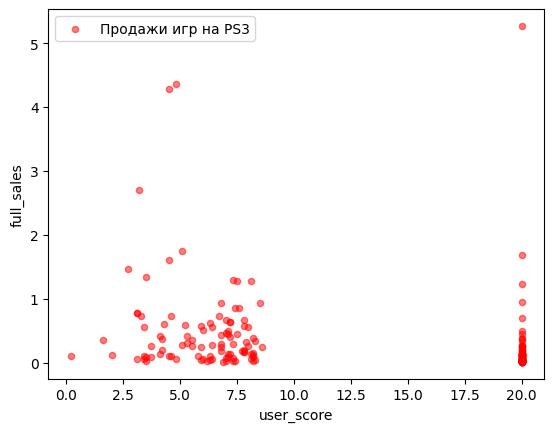

In [25]:
# Посмотрим как влияют отызвы пользователей и критиков на продажи на примере платформы PS4.
# Не понял почему в задании просят посомтреть влияние двух факторов на ОДНУ платформу, а потом просят соотнести со всеми.
# Поэтому делаю для выделенного топа диаграммы

data = data[data['user_score'] != -5]

ps4 = data[data['platform']=='PS4']
xone = data[data['platform']=='XOne']
x3ds = data[data['platform']=='3DS'] 
x360 = data[data['platform']=='X360']
ps3 = data[data['platform']=='PS3']

print('Диаграммы рассеивания продаж игр в зависимости от рейтинга игроков')
ps4.plot(x=('user_score'), y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на PS4')
xone.plot(x='user_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на XOne')
x3ds.plot(x='user_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на 3DS')
x360.plot(x='user_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на X360')
ps3.plot(x='user_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на PS3')

Диаграммы рассеивания продаж игр в зависимости от рейтинга критиков


<Axes: xlabel='critic_score', ylabel='full_sales'>

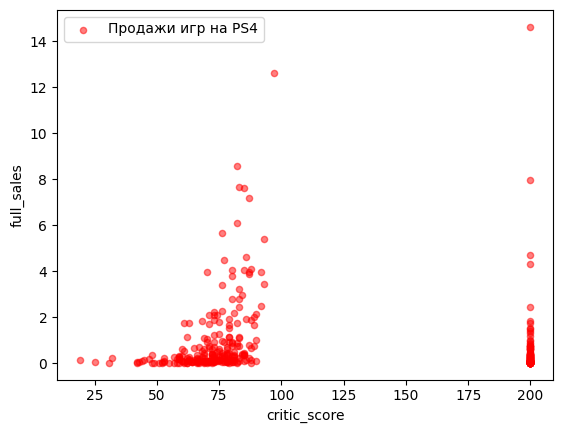

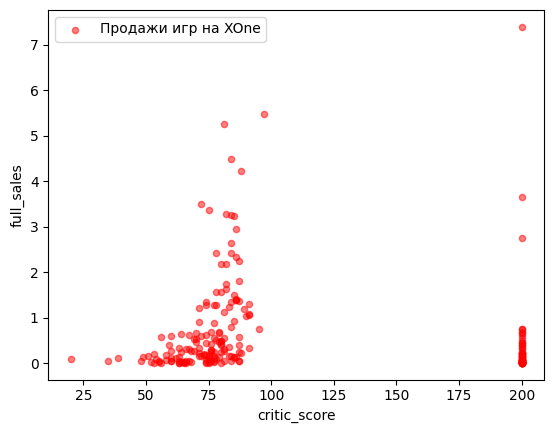

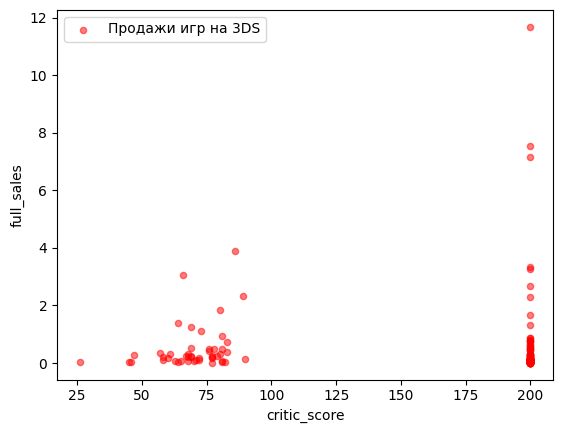

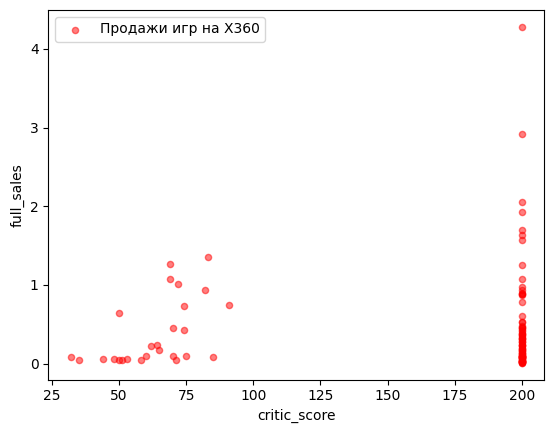

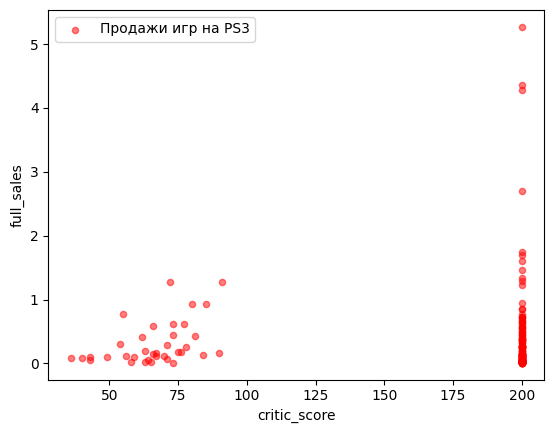

In [27]:
print('Диаграммы рассеивания продаж игр в зависимости от рейтинга критиков')
ps4.plot(x='critic_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на PS4')
xone.plot(x='critic_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на XOne')
x3ds.plot(x='critic_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на 3DS')
x360.plot(x='critic_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на X360')
ps3.plot(x='critic_score', y='full_sales', color='red', kind='scatter', alpha=0.5, label='Продажи игр на PS3')

In [30]:
print("Коэффициент корреляции между продажей игр и рейтингом пользователей на эту игру:")
print('PS4:', ps4['user_score'].corr(ps4['full_sales']))
print('XOne:', xone['user_score'].corr(xone['full_sales']))
print('3DS:', x3ds['user_score'].corr(x3ds['full_sales']))
print('PS3:', ps3['user_score'].corr(ps3['full_sales']))
print('X360:', x360['user_score'].corr(x360['full_sales']))

Коэффициент корреляции между продажей игр и рейтингом пользователей на эту игру:
PS4: -0.11424143406648939
XOne: -0.10596014447479452
3DS: -0.01190668359843316
PS3: -0.25645485367327286
X360: -0.1374047189184088


In [32]:
print("Коэффициент корреляции между продажей игр и рейтингом критиков на эту игру:")
print('PS4:', ps4['critic_score'].corr(ps4['full_sales']))
print('XOne:', xone['critic_score'].corr(xone['full_sales']))
print('3DS:', x3ds['critic_score'].corr(x3ds['full_sales']))
print('PS3:', ps3['critic_score'].corr(ps3['full_sales']))
print('X360:', x360['critic_score'].corr(x360['full_sales']))

Коэффициент корреляции между продажей игр и рейтингом критиков на эту игру:
PS4: -0.07337578176762614
XOne: -0.10166186059913587
3DS: -0.021387725090875005
PS3: 0.02785554618066578
X360: 0.08581553549785392


Делая вывод по итогам коэфициентов корреляции, можно заметить, что взаимосвязь мужду рейтингом пользователей и продажами - не существует. А вот в случае с оценками критиков, то они влияют на продажи игр, но не сильно. 

In [33]:
# Рассмотрим зависимость жанра игры от ее продаж
# Посмтроим табличку по жанрам, в котором укажем сумму, количесвто и медиану общих продаж игры
genre = data.groupby('genre')[['full_sales']].agg({'full_sales': ['sum', 'count', 'median']})
genre.columns = genre.columns.droplevel(0) 
genre.sort_values(by='median', ascending=False)

,sum,count,median
genre,,,
Shooter,170.72,123,0.560
Sports,109.09,151,0.240
Platform,17.66,34,0.145
Fighting,28.14,58,0.130
Misc,35.98,101,0.110
Role-Playing,101.44,221,0.110
Simulation,12.92,40,0.105
Action,195.70,579,0.100
Racing,27.27,66,0.095


(0.0, 4.0)

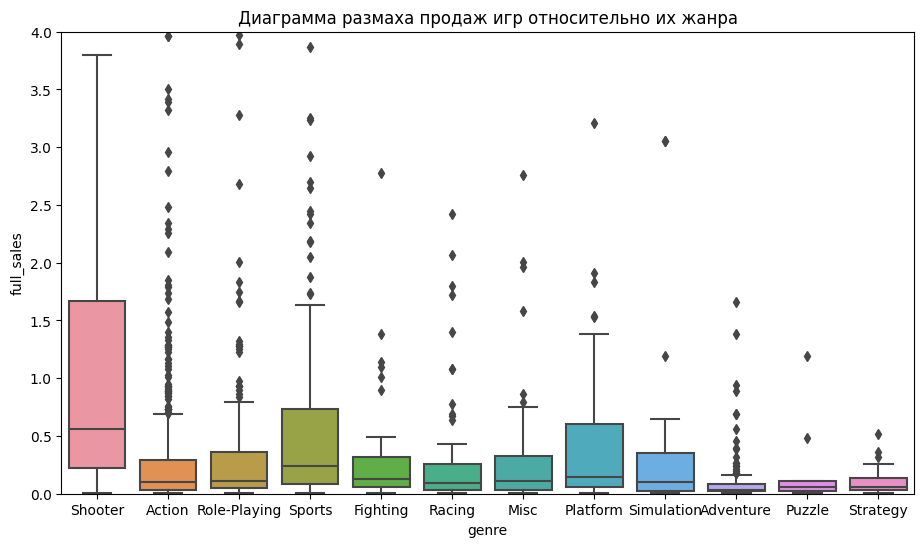

In [34]:
plt.figure(figsize=(11,6))
boxplot_2 = sns.boxplot(y=data['full_sales'], x=data['genre'])
boxplot_2.axes.set_title('Диаграмма размаха продаж игр относительно их жанра')
plt.ylim(0, 4)

Диаграмма размаха идеально показывает нам продажу игру относителньо их жанра, поэтому из по ней можно сделать несколько выводов:
- Лучше всего себя показывают игры жанра Shooter. Игры с таким жанром более перспективны. Они будут приносить доход, независимо от платформы. 
- Игры жанра Sports показывают себя хуже чем Shooter, но тоже пользуются спрсос.
- Игры жанра Action не уступают по продажам жанру Shooter, но они менее надежны и менее перспективны на будущее.
- Хуже свех себя показал жанр Puzzle, скорее всего такой жанр больше расположен на целевую аудиторию детей, но увы в наше время дети предпочитают игры по типу BrawlStars :)
- Что касается отсальных жанров, то говоря простым языком они "держаться на плаву", но делать на них ставку на предстоящий год буквально бесмысленно, они не принесут большой прибыли компании.

Властью данной многой я объявляю о завершении самого длительного Шага в этом проекте. Честно говоря я думаю, что где-то я наделал ошибок...

# Шаг 3. Портрет пользователя каждого региона

In [35]:
# Узнаем сколько всего было продаж в регионах
full_na_sales = data['na_sales'].sum()
full_eu_sales = data['eu_sales'].sum()
full_jp_sales = data['jp_sales'].sum()

Text(0.5, 1.0, 'Гистограмма распределения долей платформ в Северной Америки')

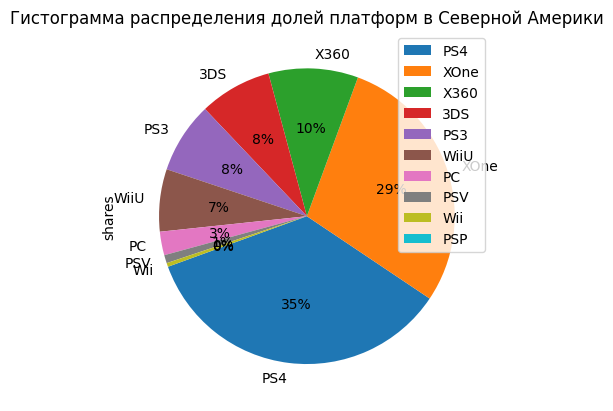

In [36]:
# Определим топ 5 платформ в разных регионах
top_na_sales = data.groupby('platform')[['na_sales']].sum().sort_values(by='na_sales', ascending=False)
top_na_sales.head()

# Опишем различие в долях
top_na_sales['shares'] = top_na_sales['na_sales'] / full_na_sales
top_na_sales

# Визуализируем данные в долях на круговой диаграмме для Северной Америки
top_na_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%', startangle=200)
plt.title('Гистограмма распределения долей платформ в Северной Америки')

Text(0.5, 1.0, 'Гистограмма распределения долей платформ в Европы')

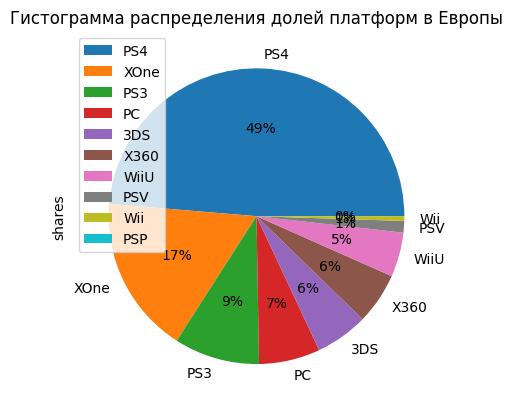

In [37]:
top_eu_sales = data.groupby('platform')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False)
top_eu_sales.head()

top_eu_sales['shares'] = top_eu_sales['eu_sales'] / full_eu_sales
top_eu_sales

# Визуализируем данные в долях на круговой диаграмме для Европы
top_eu_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения долей платформ в Европы')

Text(0.5, 1.0, 'Гистограмма распределения долей платформ в Японии')

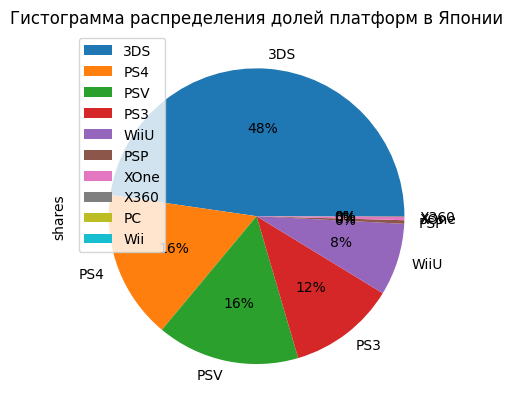

In [38]:
top_jp_sales = data.groupby('platform')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False)
top_jp_sales.head()

top_jp_sales['shares'] = top_jp_sales['jp_sales'] / full_jp_sales
top_jp_sales

# Визуализируем данные в долях на круговой диаграмме для Японии
top_jp_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения долей платформ в Японии')

### Проделаем все тоже самое но для жанров

Text(0.5, 1.0, 'Гистограмма распределения жанра игр для платформ в Северной Америки')

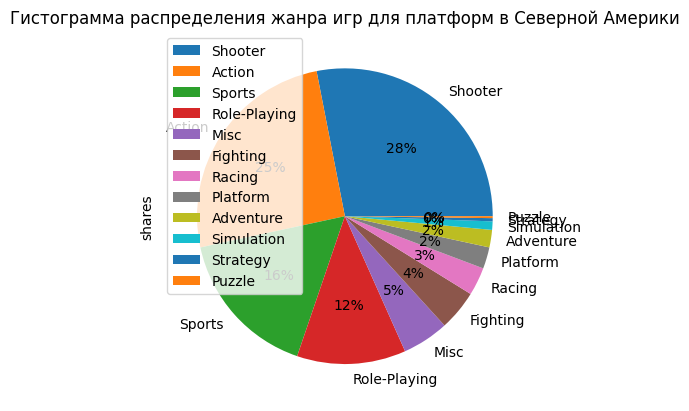

In [39]:
top_na_sales = data.groupby('genre')[['na_sales']].sum().sort_values(by='na_sales', ascending=False)
top_na_sales.head()

# В долях
top_na_sales['shares'] = top_na_sales['na_sales'] / full_na_sales

# Визуализируем данные в долях на круговой диаграмме для Северной Америки
top_na_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения жанра игр для платформ в Северной Америки')

Text(0.5, 1.0, 'Гистограмма распределения жанра игр для платформ в Европы')

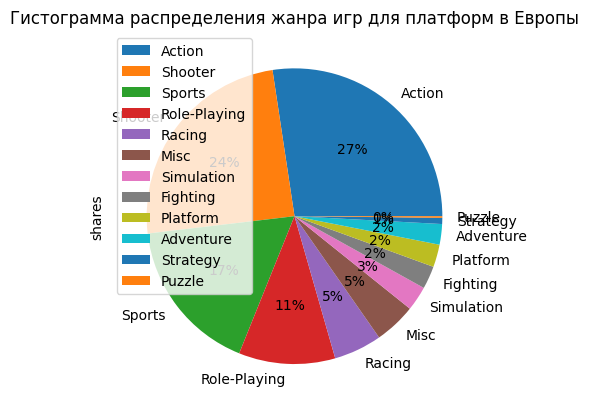

In [40]:
top_eu_sales = data.groupby('genre')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False)
top_eu_sales.head()

# В долях
top_eu_sales['shares'] = top_eu_sales['eu_sales'] / full_eu_sales

# Визуализируем данные в долях на круговой диаграмме для Европы
top_eu_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения жанра игр для платформ в Европы')

Text(0.5, 1.0, 'Гистограмма распределения жанра игр для платформ в Японии')

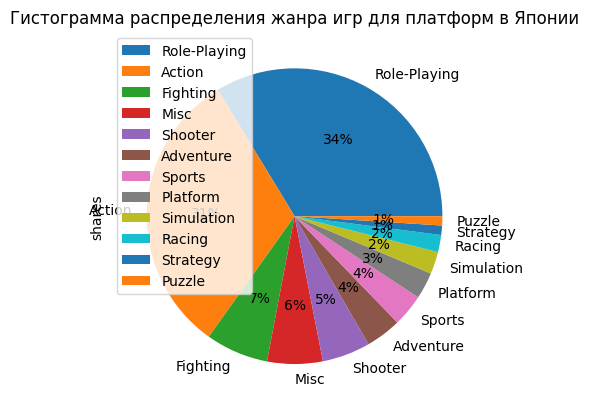

In [41]:
top_jp_sales = data.groupby('genre')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False)
top_jp_sales.head()

# В долях
top_jp_sales['shares'] = top_jp_sales['jp_sales'] / full_jp_sales

# Визуализируем данные в долях на круговой диаграмме для Японии
top_jp_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения жанра игр для платформ в Японии')

### По третьему кругу, но на этот раз проверим как влияет рейтинг ESRB на продажи в регионах

Text(0.5, 1.0, 'Гистограмма распределения рейтинга в Северной Америки')

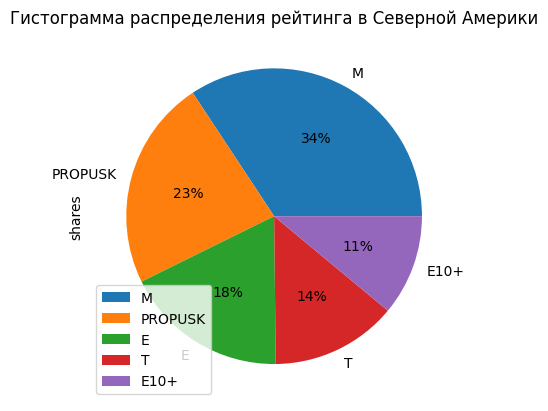

In [42]:
top_na_sales = data.groupby('rating')[['na_sales']].sum().sort_values(by='na_sales', ascending=False)

# В долях
top_na_sales['shares'] = top_na_sales['na_sales'] / full_na_sales

# Визуализируем данные в долях на круговой диаграмме для Северной Америки
top_na_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения рейтинга в Северной Америки')

Text(0.5, 1.0, 'Гистограмма распределения рейтинга платформ в Европы')

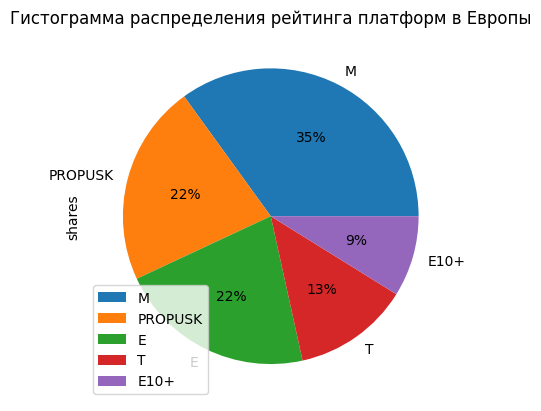

In [43]:
top_eu_sales = data.groupby('rating')[['eu_sales']].sum().sort_values(by='eu_sales', ascending=False)

# В долях
top_eu_sales['shares'] = top_eu_sales['eu_sales'] / full_eu_sales

# Визуализируем данные в долях на круговой диаграмме для Европы
top_eu_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения рейтинга платформ в Европы')

Text(0.5, 1.0, 'Гистограмма распределения рейтинга платформ в Японии')

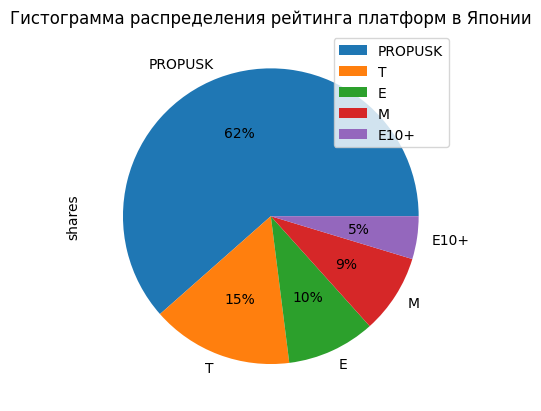

In [44]:
top_jp_sales = data.groupby('rating')[['jp_sales']].sum().sort_values(by='jp_sales', ascending=False)

# В долях
top_jp_sales['shares'] = top_jp_sales['jp_sales'] / full_jp_sales

# Визуализируем данные в долях на круговой диаграмме для Японии
top_jp_sales.plot(y='shares', kind='pie', normalize=True, autopct='%1.0f%%')
plt.title('Гистограмма распределения рейтинга платформ в Японии')

### Портрет пользователя Северной Америки
- Самыми популярными платформами в СА являются PS4, XOne и 3DS.
- В СА на лидирующих позивиях 4 жанра игры: Shooter, Action, Sports и Role-Playing
- Рейтинг игрков в СА: M, E, T и E10+ 

### Портреть пользователя для Европы
- Двумя ведущими платформами тут являются PS4 и XOne. Остальные практически разделили доли поровну
- В Европе на лидирующих позивиях 4 жанра игры: Shooter, Action, Sports и Role-Playing
- Рейтинг игрков в Европе: M, E, T и E10+ 

### Портрет пользователя для Японии
- Практически всю диаграмму между собой поделили такие платформы, как: 3DS, PS4, PSV, PS3 и WiiU
- Практически всю диаграмму поделили между собой два жанра: Action и Role-Playing
- Рейтинг игрков в Японии: T, E, M и E10+ 

# Шаг 5. Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Нулевая гипотеза: Средние пользователиские рейтинги платформ одинаковы
- Альтернативаня гипотеза: Средние пользовательские рейтинги различаются

In [45]:
# Первым делом я уберу заглушку, которую ставил еще в самом начале
data = data[data['user_score']!=20]

# Для удобной работы создам два датафрема для разных платформ
xbox_one = data[data['platform']=='XOne']
pc = data[data['platform']=='PC']

# Удалим все пропуски в столбце user_score
xbox_one = xbox_one.dropna(subset=['user_score'])
pc = pc.dropna(subset=['user_score'])

from scipy import stats as st

alpha = 0.05 
results = st.ttest_ind( xbox_one['user_score'], pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза верна, так как средние пользовательские рейтинги близки!

### Средние пользовательские рейтинги жанров Action и Sports разные.
- Нулевая гипотеза: Средние пользовательские рейтинги жанров разные
- Альтернативаня гипотеза: Средние пользовательские рейтинги одинаковы

In [46]:
# Опять же атки создам два датафрейма для разных жанров
action = data[data['genre']=='Action']
sport = data[data['genre']=='Sports']

# Удалим пропуски
action = action.dropna(subset=['user_score'])
sport = sport.dropna(subset=['user_score'])

alpha = 0.05
results = st.ttest_ind(action['user_score'], sport['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, принимаем альтернативную')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу, принимаем альтернативную


Нулевая гипотеза оказалась неверна, так как средние пользовательские рейтинги жанров схожи

# Общий вывод

Целью проделанной работы было выявление успешности игры для того, чтобы в последующем году сделать на нее ставку. 
Исследование проводилось по играм, платформам, жанрам, оценкам как критиков так и игроков в целом в периоде с 2014 по 2016 год. 
По результатм исследования можно сделать следующие выводы:
- Наиболее популярными и актуальными платформами для игроков являются  PS4, XOne, 3DS, WiiU, PS3
- С полной уверенностью могу заявить, что игры в жанре Shooter будут пользоватья большим успехом не только в 2017 году, но и в последующих пару лет. Также стоить обратить особое внимание на игры в жанре: Action, Sports и Rol-playing. Эти игры также будут приносить доход компании в 2017 году.
- Оценки критиков и пользоватлей никак не влияют на продажи игр. 
- У Северной Америки и Европы практически схожы игровые интересы в плане жанра. Именно в этих регионах следует увеличить поставку игр в жанре Shooter. В Японии интересы игроков знгачительно отличаются, в этом регионе стоит сделать ставку на игры в жанре Action и Role-Playing.
- В процессе был составлен подробный портрет потребителя на каждый регион в частности:
- `Портрет пользователя Северной Америки`
- Самыми популярными платформами в СА являются PS4, XOne и 3DS.
- В СА на лидирующих позивиях 4 жанра игры: Shooter, Action, Sports и Role-Playing
- Рейтинг игрков в СА: M, E, T и E10+
- `Портрет пользователя для Европы`
- Двумя ведущими платформами тут являются PS4 и XOne. Остальные практически разделили доли поровну
- В Европе на лидирующих позивиях 4 жанра игры: Shooter, Action, Sports и Role-Playing
- Рейтинг игрков в СА: M, E, T и E10+ 
- `Портрет пользователя для Японии`
- Практически всю диаграмму между собой поделили такие платформы, как: 3DS, PS4, PSV, PS3 и WiiU
- Практически всю диаграмму поделили между собой два жанра: Action и Role-Playing
- Рейтинг игрков в СА: T, E, M и E10+ 

### Также были проверенны две гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


- Первая гипотеза была верна, что подтвердилось проверкой. Средний пользовательский рейтинг на платформах Xbox One и PC действительно схож.
- Вторая гипотеза к сожалению или к счастью  была опровергнута. Средний пользовательский рейтинг жанров Action и Sports схожи.